In [1]:
# -----------------------------------------------------------
# HEART DISEASE PREDICTION USING GRADIENT BOOSTING
# -----------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
df = pd.read_csv(r"C:\Users\kamir\slk projects\Gradient Boosting\heart_cleveland_upload-checkpoint.csv")

print("Dataset Loaded Successfully!")
df.head()


Dataset Loaded Successfully!


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [3]:
#Label Encoding for Object Columns


le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])


#It checks every column in the dataset.

#If the column contains text (dtype = object),

#It converts the text values (Male/Female, True/False, etc.) into numbers.


In [4]:
for col in ["id", "dataset"]:
    if col in df.columns:
        df = df.drop(col, axis=1)
#Removing unnecessary columns improves accuracy.

In [5]:
#Convert 'num' Column to Binary

if "num" in df.columns:
    df["num"] = df["num"].apply(lambda x: 1 if x > 0 else 0)

#num column contains values like 0, 1, 2, 3, 4

#0 = no heart disease

#1,2,3,4 = different levels of heart disease


In [6]:
df.columns
#Displays all column names
# Helps confirm that data was cleaned correctly

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')

In [7]:
target = "condition"
#Setting Target Variable

In [8]:
target = "num"


In [9]:
X = df.drop("condition", axis=1)
y = df["condition"]
#Separate Features (X) and Target (y)

In [11]:
df = df.fillna(df.median(numeric_only=True))
#Fill Missing Values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)


In [13]:
#Split Data into Train and Test

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [14]:
#Split Data into Train and Test

gb = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

gb.fit(X_train_scaled, y_train)


,loss,'log_loss'
,learning_rate,0.1
,n_estimators,200
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


Gradient Boosting Accuracy: 0.7333333333333333


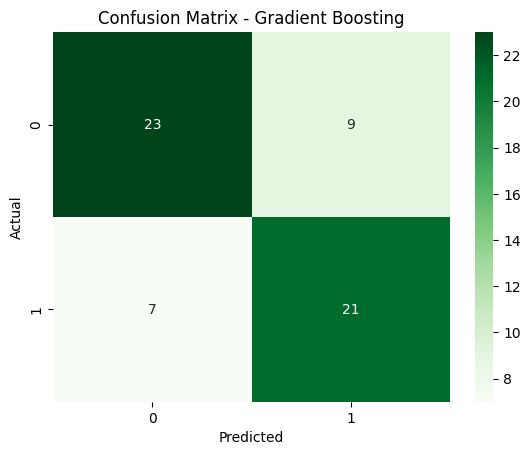


Classification Report:

              precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60



In [15]:
y_pred = gb.predict(X_test_scaled)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


In [10]:
sample = {
    "age": 55,
    "sex": 1,
    "cp": 0,
    "trestbps": 130,
    "chol": 250,
    "fbs": 0,
    "restecg": 1,
    "thalach": 150,   # FIXED spelling here
    "exang": 0,
    "oldpeak": 1.2,
    "slope": 2,
    "ca": 0,
    "thal": 2
}